# Machine Translation

## method

| Method            | Time            | Description                                                                                                         | Classic Models                                                  | Pros                                                       | Cons                                                        |
|-------------------|-----------------|---------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------|------------------------------------------------------------|-------------------------------------------------------------|
| Rule-based        | 1950s - 1980s   | Translates text using linguistic rules and dictionaries for source and target languages                             | Direct, Transfer, and Interlingual approaches                  | Systematic, predictable results, customizable rules        | Requires extensive linguistic knowledge, time-consuming     |
| Example-based     | Late 1980s      | Translates text by finding examples of similar translations in a parallel corpus and combining them to form output | Example-Based Machine Translation (EBMT)                      | Leverages existing translations, learns from real examples | Limited by the quality and size of the parallel corpus      |
| Statistical (SMT)      | 1990s - 2010s   | Translates text using statistical models trained on parallel corpora                                                | IBM Models, Phrase-Based SMT, Tree-based SMT, Syntax-based SMT | Data-driven, scalable, handles ambiguity                   | Requires large parallel corpora, limited by model complexity |
| Neural   (NMT)         | 2010s - present | Translates text using deep learning models, such as RNNs, CNNs, and Transformers                                    | Seq2seq, Attention Mechanisms, Transformer                     | Improved quality, handles long-range dependencies           | Requires large amounts of data, computationally expensive   |


## timeline

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*XuR_iuPOuY-8i5A3cGmcBw.png' />

## difference in language

Language differences can be observed in various aspects

- word order within phrase or sentences

- vocabularies for similar concepts

- unique phrases

- specific prepositions

- inflection patterns

- relations or actions

- gender-based pronoun distinctions

- color naming

## benchmark dataset

| Dataset  | Data Size         | Source                                        | language                                           |
|----------|-------------------|-----------------------------------------------|-------------------------------------------------------|
| WMT      | Varies yearly     | news, literature, and web text | 4 M En-De, 12M En-Fr |
| IWSLT    | Varies yearly     | Spoken language, TED talks  | En-De, En-Fr, En-It |
| Europarl | 60+ million tokens| Proceedings of European Parliament        | 21 European                                |


## rule-based machine translation

### Vauquois's Triangle

- relationship between the complexity of translation approaches and the level of linguistic analysis required. 

- as degree of linguistic analysis increases, the amount of transfer between the source and target languages decreases. 

<img src='https://www.researchgate.net/profile/Matiss-Rikters/publication/335715215/figure/fig1/AS:801496312594433@1568103020269/The-Vauquois-Triangle-for-MT-Vauquois-1968.ppm' />

### level of translation

<table>
  <tr>
    <th colspan='2'>Type of Translation</th>
    <th>Level</th>
    <th>Analysis</th>
    <th>substitution</th>
  </tr>
  <tr>
    <td>Direct</td>
    <td>string-string translation</td>
    <td>0</td>
    <td>No</td>
    <td>Word-word</td>
  </tr>
  <tr>
    <td rowspan='5'>Indirect</td>
    <td>semi-direct translation</td>
    <td>1</td>
    <td>local context</td>
    <td>phrase-to-phrase</td>
  </tr>
  <tr>
    <td>Syntactic transfer</td>
    <td>2</td>
    <td>Syntactic</td>
    <td>tree-to-tree</td>
  </tr>
  <tr>
    <td>Semantics transfer</td>
    <td>3</td>
    <td>Semantics</td>
    <td>meaning-to-string</td>
  </tr>
  <tr>
    <td>conceptual transfer</td>
    <td>4</td>
    <td>Deep</td>
    <td>interlingua-to-string</td>
  </tr>
</table>


<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/The_Vauquois_triangle_version_1985.svg/1152px-The_Vauquois_triangle_version_1985.svg.png' />

## statistical Machine translation: IBM models

The IBM models for statistical machine translation were introduced in the early 1990s by IBM 

There are five IBM models (IBM Model 1 to IBM Model 5), each building upon the previous one to improve translation quality. 


| Model    | Components                                              | Improvement                                                        |
|----------|---------------------------------------------------------|--------------------------------------------------------------------|
| IBM 1    | Translation probabilities (t)                           | Basic model, introduces translation probabilities                  |
| IBM 2    | Translation probabilities (t), Distortion (q)           | Considers word alignment probabilities (distortion)               |
| IBM 3    | Translation (t), Distortion (q), Fertility (p)          | Introduces fertility probabilities to capture phrase duplication  |
| IBM 4    | Translation (t), Distortion (q), Fertility (p), HMM     | Incorporates a Hidden Markov Model to improve word alignment      |
| IBM 5    | Translation (t), Distortion (q), Fertility (p), HMM, DP | Introduces deletion and position probabilities for better fitting |


IBM models are based on the noisy channel model, which assumes that the source text is a distorted version of the target text. 

Objective function of noisy-channel model: find the best translation $e'$ given the source sentence $f$ by maximizing the probability of the target text.

$$e' = \arg\max_e P(e|f) = \arg\max_e P(f|e) P(e)$$

$P(f|e)$ translation model, $P(e)$ language model

### model 1

IBM Model 1: assumes that word alignments are uniform and independent of the source and target sentence lengths. 

It only considers lexical translation probabilities (i.e., the probability that a word in one language translates to a word in another language).

EM (expectation-maximization) algorithm: find optimal alignment $\hat{a}$ maximizes the translation probability

$$
\hat{a} = \arg\max_a\prod_{j=1}^m p(f_j|e_{a_j})
\\[1em]
\hat{a}_j = \arg\max_{a_j} p(f_j|e_{a_j})
$$

Derivation: maximizing joint probability equivalent to maximizing translation probability

$p(f,a|e)$ is joint probability of target sentence $f$ and alignment $a$ given the source sentence $e$,

By Bayes rule, is product of the alignment probability $p(a|e)$ and translation probability $p(f|a,e)$

since $\frac{c}{(n+1)^m}$ is a constant, joint proability is proportional to translation probability

$$
p(f,a|e) = p(a|e) p(f|a,e) = \frac{c}{(n+1)^m} \prod_{j=1}^m p(f_j|e_{a_j})\propto \prod_{j=1}^m p(f_j|e_{a_j})
$$

- Length probability $p(m|e) = c$

    probability of length of target sentence $m$ given the source sentence $e$. Here, $c$ is a constant.

- Alignment probability $p(a_i|e) = \frac{1}{n+1}$

    a **uniform prior** probability of a specific alignment $a_i$ given the source sentence $e$. that is, alignment probability is same for any word in target sentence.
    
    $n$ is a constant that depends on the lengths of source and target sentences

- Translation probability: $p(f_i|e_{a_i})$

    probability of translating a source word $e_{a_i}$ to a target word $f_i$. 
    
    The alignment $a_i$ indicates which source word $e_{a_i}$ corresponds to the target word $f_i$.

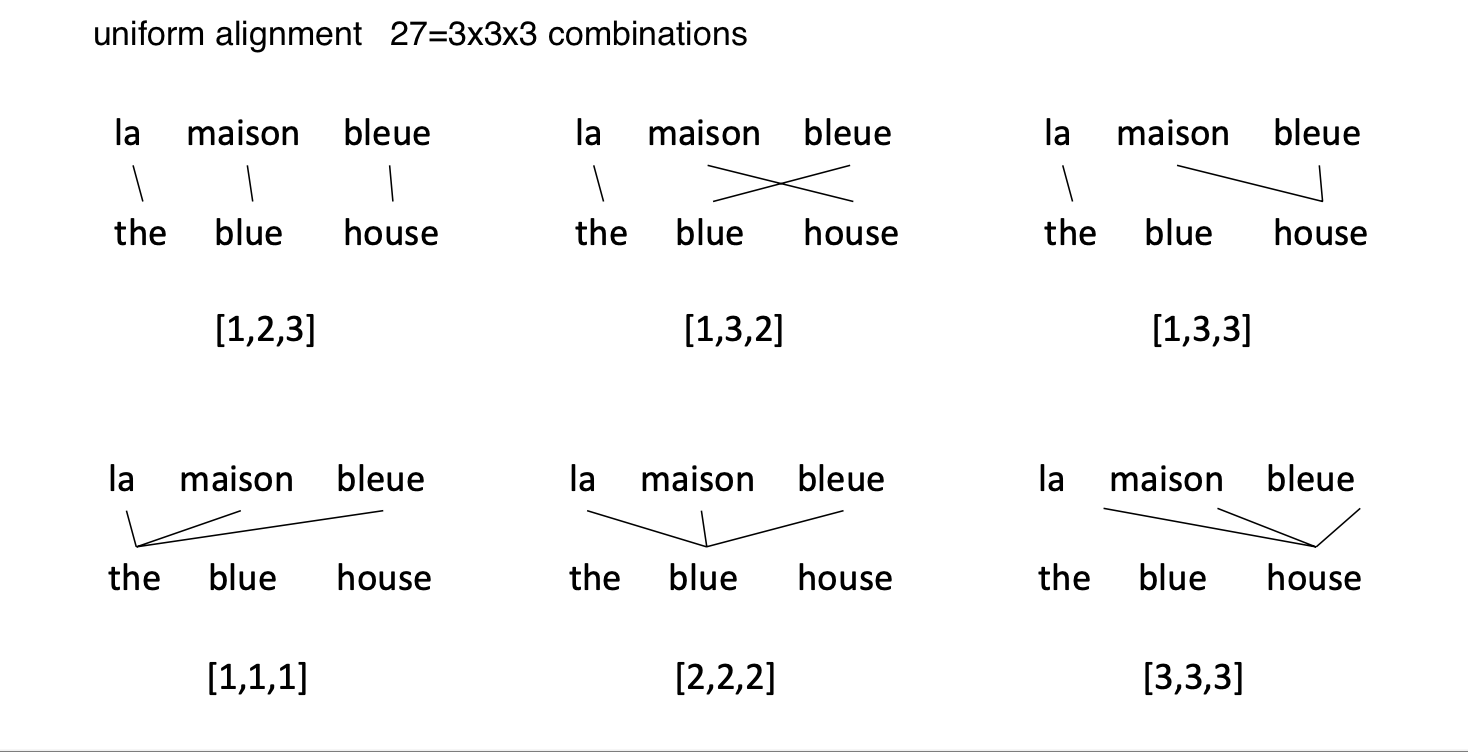

### model 2

introducing **distortion probabilities** that depend on the source and target sentence lengths and the positions of the words in the sentences.

distortion parameters $q(i | j, l, m)$ for word positions $i$ and $j$ in the source and target sentences, respectively, with lengths $l$ and $m$.

The distortion parameters are also learned by EM

objective function: maximize likelihood of the target sentence given the source sentence $p(f | e)$

$$
\arg \max p(f | e) = \sum_a p(f, a | e) = \sum_a p(a | e) p(f | a, e) = \sum_a \frac{c}{(n+1)^m}\prod_{j=1}^m [q(i | j, l, m) t(f_j | e_{a_j})]
$$

$\sum_a$ is summation over all possible alignments between source and target sentences.

$p(f, a | e)$ is probability of target sentence and an alignment $a$ given the source sentence

$t(f_j | e_{a_j})$ is the translation probability of word $f_j$ given the aligned word $e_{a_j}$.

### model 3

introduces fertility probabilities 

$$f(\phi_i | e) = f_i$$

the probability that a word in the source language generates a certain number of words in the target language

$\phi_i$ is the fertility of the word $e$

$f_i$ is a probability parameter. 

$f_0$ is an extra parameter that defines the fertility for the null (empty) word $\phi_0$.

null word $\phi_0$: words in the target language that do not have a corresponding source word. 

### IBM Model 4-5

IBM Model 4: Non-deficient algorithm (avoid overlaps, overflow) where one source word aligns to multiple target words, as well as where multiple source words align to the same target word. 

IBM Model 5:  It refines the fertility probabilities and distortion model introduced in the previous models and introduces additional parameters to better capture translation probabilities and word alignments.

### EM algorithm

Initialization: uniform translation probability

$$
p(f|e) = \frac{1}{|V|}
$$


E-step 1: compute the expected counts $E[count(t(f|e))]$ or $tcount(f|e)$ for all word pairs $(f_j, e_{a_j})$, 

    i.e., weighted counts of how often a source word $e_i$ is aligned with a target word $f_j$. 

    represent a soft alignment between source and target words, as opposed to hard alignments where each target word is aligned to exactly one source word. 

- compute alignment probability $P(a, f|e)$ by multiplying all translation probabilities 

    $$P(a, f|e)=\prod_{j=1}^m t(f_j|e_{a_j})$$

- normalize alignment probability  $P(a, f|e)$ to get $P(a|e, f)$

    $$P(a|e, f)=\frac{P(a, f|e)}{\sum_a P(a, f|e)}$$

- compute expected counts, by weighting each count by $P(a|e, f)$

    $$E[count(t(f|e))]=\sum_a P(a|e, f)$$


M-step 1: Compute the MLE probability params by normalizing the expected counts to sum to 1.

$$
t(f|e) = \frac{E[count(t(f|e))]}{\text{total count}(e)}
$$

E-step 2a: Recompute $P(a, f|e)$ again by multiplying the t probabilities

iterations until convergence

In [9]:
import itertools

corpus = [('green house', 'casa verde'), ('the house', 'la casa')]

# Print corpus:
vocab1 = []
vocab2 = []
print("Sentence pairs")
for i in range(len(corpus)):
    tup = corpus[i]
    print(i, '%s\t%s' % tup)
    vocab1 += tup[0].split()
    vocab2 += tup[1].split()

# Print Vocabulary
vocab1 = list(set(vocab1))
vocab2 = list(set(vocab2))
print()
print("Vocabulary")
print("Source Language:", vocab1)
print("Target Language:", vocab2)
print()

# EM initialization: uniform translation probability
print("EM initialization")
prob = {}
for w in vocab1:
    for v in vocab2:
        prob[(w, v)] = 1. / len(vocab2)
        print("P(%s|%s) = %.2f\t" % (v, w, prob[(w, v)]), end='')
    print()
print("="*80)

def E_step(prob):
    """compute the expected counts E[count(t(f|e))] for all word pairs (f_j,e_{a_j})"""
    
    print("E_step")

    def compute_align(a, sent_pair):
        """compute alignment probability P(a,f|e) by multiplying all t probabilities"""
        print("\t Alignment:", end=' ')
        p = 1.
        s = sent_pair[0].split()
        t = sent_pair[1].split()
        for i in range(len(a)):
            w = s[i]
            v = t[a[i]]
            print((w, v), end=' ')
            p = p * prob[(w, v)]
        print()
        print("\t p(a,f|e): %.2f" % p)
        return p

    new_prob = {}
    for w in vocab1:
        for v in vocab2:
            new_prob[(w, v)] = 0.

    for i in range(len(corpus)):
        print("Sentence Pair", i)
        sent_pair = corpus[i]
        sent_l = len(sent_pair[0].split())
        total_i = []

        for a in itertools.permutations(range(sent_l)):
            total_i.append(compute_align(a, sent_pair))

        # normalize alignment probability P(a,f|e) to get P(a|e,f)
        total_i_sum = sum(total_i)
        total_i = [t / total_i_sum for t in total_i]
        print("\n\t Normalizing")
        print("\t p(a|e,f):", total_i)
        print()

        # compute expected fractional counts, by weighting each count by P(a|e,f)
        s = sent_pair[0].split()
        t = sent_pair[1].split()
        cnt = 0
        for a in itertools.permutations(range(sent_l)):
            for j in range(len(a)):
                w = s[j]
                v = t[a[j]]
                new_prob[(w, v)] += total_i[cnt]
            cnt += 1

    #  print expected fractional counts and total count total(e)
    print("expected fractional counts")
    for w in vocab1:
        total_w = 0.
        for v in vocab2:
            total_w += new_prob[(w, v)]
            print("tcount(%s|%s) = %.2f\t" % (v, w, new_prob[(w, v)]), end='')
        print("total(%s) = %2.f" % (w, total_w), end='')

    return new_prob


def M_step(prob):
    """Compute the MLE probability params by normalizing the tcounts to sum to 1."""
    print("\nM_step")
    print("Translation probability")
    for w in vocab1:
        total_w = sum([prob[w, v] for v in vocab2])
        for v in vocab2:
            prob[(w, v)] = prob[(w, v)] / total_w
            print("P(%s|%s) = %.2f\t" % (v, w, prob[(w, v)]), end='')
        print('\n')
    return prob


for i in range(0, 10):
    print("step: ", i)
    print("-"*80)
    prob = E_step(prob)
    print("-"*80)
    prob = M_step(prob)
    print("="*80)


Sentence pairs
0 green house	casa verde
1 the house	la casa

Vocabulary
Source Language: ['house', 'green', 'the']
Target Language: ['la', 'verde', 'casa']

EM initialization
P(la|house) = 0.33	P(verde|house) = 0.33	P(casa|house) = 0.33	
P(la|green) = 0.33	P(verde|green) = 0.33	P(casa|green) = 0.33	
P(la|the) = 0.33	P(verde|the) = 0.33	P(casa|the) = 0.33	
step:  0
--------------------------------------------------------------------------------
E_step
Sentence Pair 0
	 Alignment: ('green', 'casa') ('house', 'verde') 
	 p(a,f|e): 0.11
	 Alignment: ('green', 'verde') ('house', 'casa') 
	 p(a,f|e): 0.11

	 Normalizing
	 p(a|e,f): [0.5, 0.5]

Sentence Pair 1
	 Alignment: ('the', 'la') ('house', 'casa') 
	 p(a,f|e): 0.11
	 Alignment: ('the', 'casa') ('house', 'la') 
	 p(a,f|e): 0.11

	 Normalizing
	 p(a|e,f): [0.5, 0.5]

expected fractional counts
tcount(la|house) = 0.50	tcount(verde|house) = 0.50	tcount(casa|house) = 1.00	total(house) =  2tcount(la|green) = 0.00	tcount(verde|green) = 0.50	t

## Neural Machine Translation (NMT)

### Limitations

Out of vocabulary terms: struggles with handling rare or unseen words during training

Domain adaptation: NMT systems may perform poorly when applied to a domain different from the one they were trained on, requiring adaptation techniques

Long-distance context: Capturing long-range dependencies in sentences is challenging for recurrent models like LSTMs.

Low-resource languages: NMT models require large parallel datasets, which are not available for many languages.

Common sense: lack common-sense reasoning, leading to translations that are grammatically correct but semantically incorrect or nonsensical.

Biased: learn and propagate biases present in the training data

Interpretability: It is challenging to understand and interpret the internal workings of NMT models, making it difficult to diagnose and fix issues.

### LSTM seq2seq model

encoder

- input: [BOS] + reversed source sentence + [EOS]

- output: a large fixed-size context vector

decoder: left-to-right beam search

- input: [BOS] + normal order target sentence

- output: normal order target sentence + [EOS]

reversed LSTM: feed source sentence in **reverse order** to the encoder

- help alignment and capture the short-term dependencies between the source and target sentences 

- because the beginning of the source sentence becomes closer to the beginning of the target sentence

- less important with bidirectional RNN or attention mechanisms

<img src='https://user-images.githubusercontent.com/13735079/34563713-d9b26bb6-f13a-11e7-8c12-a1830a397d78.png' />